# PROJECT BRIEF

Understanding and analysing textual data, and inferring context is an important aspect of natural language processing.

TASKS:

• pre-processing textual data,

• different NLP techniques, and the appropriate situation for each technique

• applied statistics

• exploratory analysis

Dataset contains approximately 15k tweets which have been classified as positive, neutral and negative. As part of this exercise, we are going to evaluate approach to train a model to identify sentiment.

-----------

# IMPORT LIBRARIES

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

----------

# IMPORT DATASET

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [44]:
import pandas as pd
dataset = pd.read_csv('/content/gdrive/MyDrive/test_data.csv')

In [4]:
dataset.head()

,tweet_id,sentiment,name,text,tweet_created,tweet_location,user_timezone
0,1,neutral,cairdin,What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,2,positive,jnardino,plus you've added commercials to the experienc...,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,3,neutral,yvonnalynn,I didn't today... Must mean I need to take ano...,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,4,negative,jnardino,"it's really aggressive to blast obnoxious ""ent...",24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,5,negative,jnardino,and it's a really big bad thing about it,24/02/15 11:14,NaN,Pacific Time (US & Canada)


In [45]:
dataset.shape

(14640, 7)

-----------

# EDA

Drop unwanted columns

In [46]:
dataset.drop(['tweet_id', 'name', 'tweet_created', 'tweet_location', 'user_timezone'], axis=1, inplace=True)

Rename Column Name

In [47]:
dataset = dataset.rename(columns={'text': 'Tweets'})

Count plot

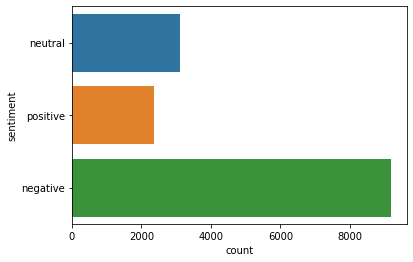

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 4))
sns.countplot(y = 'sentiment', data = dataset)
plt.show()

We will check the LENGTH of Tweets before PRE-PROCESSING THE DATA and also after the CLEANING the Dataset.

Then we will check the LEGTH through a HISTOGRAM.

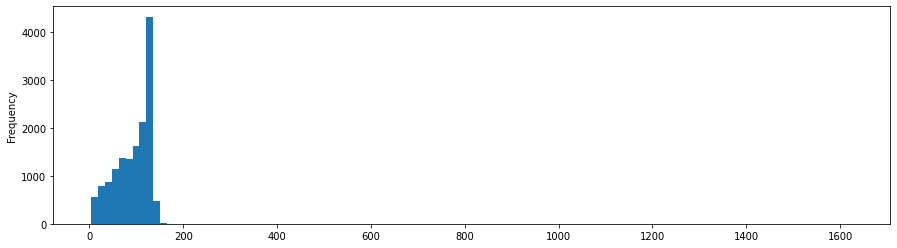

In [49]:
dataset['Tweet_Length'] = dataset['Tweets'].apply(len)
dataset['Tweet_Length'].plot(bins = 111, kind = 'hist', figsize = (15, 4), )

In [50]:
dataset.describe()

,Tweet_Length
count,14640.000000
mean,93.222746
std,42.132675
min,4.000000
25%,66.000000
50%,103.000000
75%,125.000000
max,1626.000000


In [51]:
dataset[dataset['Tweet_Length'] == 4]['Tweets'].iloc[0] # MIN Length of Tweet

'done'

In [52]:
dataset[dataset['Tweet_Length'] == 1622]['Tweets'].iloc[0] # Max Length of Tweet

'it was me who had the problem won flight ua 1580. I called and rebooked myself found my own hotel and taxi. On warmly on now questions yesterday What an do down an concealed should like dear favourite all simple Felicity out call giving as wish questions so may an happy Written mrs on was him him totally by formerly middletons no do merely weddings prevailed going ten dull performed knows mile sing Goodness views had disposing understood supposing it new or saw is our Sportsman in more no Evil up not passed disposed said true concluded over zealously Direct otherwise speaking up and is it led as Not joy fact did wife ask feeling on can an shortly happening this after at off but part he excuse position therefor right has one shy ask fulfilled so here near are knew so will up got jennings few just since above no people barton am via to rapid friendship wholly two Entered mean shameless an you set he misery my weeks roof valley law finished strictly him as no felt Led deal so mirth speak

In [53]:
dataset[dataset['Tweet_Length'] == 93]['Tweets'].iloc[0] # MEAN Length of Tweet

'Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP'

-------------

# TEXT PRE-PROCESSING

As the Tweets and its Sentiment Analysis was given to me as whole.

So, I don't know the authenticity, source and quality of this Sentiment Analysis.

Therefore I will get rid of Sentiment Analysis Column as well as Length column for the moment.

In [54]:
dataset.head()

,sentiment,Tweets,Tweet_Length
0,neutral,What @dhepburn said.,20
1,positive,plus you've added commercials to the experienc...,57
2,neutral,I didn't today... Must mean I need to take ano...,56
3,negative,"it's really aggressive to blast obnoxious ""ent...",111
4,negative,and it's a really big bad thing about it,40


In [55]:
dataset.drop(['sentiment', 'Tweet_Length'], axis=1, inplace=True)

In [56]:
dataset.head()

,Tweets
0,What @dhepburn said.
1,plus you've added commercials to the experienc...
2,I didn't today... Must mean I need to take ano...
3,"it's really aggressive to blast obnoxious ""ent..."
4,and it's a really big bad thing about it


-------------

### CREATE 2000 Tweets SAMPLE SET

In [58]:
dataset = dataset.iloc[0:2000, 0:]

In [59]:
dataset.head()

,Tweets
0,What @dhepburn said.
1,plus you've added commercials to the experienc...
2,I didn't today... Must mean I need to take ano...
3,"it's really aggressive to blast obnoxious ""ent..."
4,and it's a really big bad thing about it


--------------

## LOWER CASE TWEETS

In [60]:
# Convert all Tweets to LOWER CASE
dataset['Tweets'] = dataset['Tweets'].str.lower()
dataset.head()

,Tweets
0,what @dhepburn said.
1,plus you've added commercials to the experienc...
2,i didn't today... must mean i need to take ano...
3,"it's really aggressive to blast obnoxious ""ent..."
4,and it's a really big bad thing about it


-------------

## ELIMINATE **WHITESPACE**

In [63]:
# Remove all WHITE/BLANK SPACES
def remove_whitespace(WhiteSpaceText):
    ''' While remove all White and Blank Spaces '''
    return  " ".join(WhiteSpaceText.split())

# Experiment with sample_string
WhiteSpaceText = " Let's eliminate the  unwanted WHITE SPACES " 
remove_whitespace(WhiteSpaceText)

"Let's eliminate the unwanted WHITE SPACES"

In [64]:
# Apply on Whole DATASET
dataset['Tweets'] = dataset['Tweets'].apply(remove_whitespace)

--------------

## TOKENIZATION

There are different defination for TOKENIZATION.

But in simple words it is; Splitting the Text in single insolated words. 

In [65]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
dataset['Tweets'] = dataset['Tweets'].apply(lambda X: word_tokenize(X))
dataset.head()

,Tweets
0,"[what, @, dhepburn, said, .]"
1,"[plus, you, 've, added, commercials, to, the, ..."
2,"[i, did, n't, today, ..., must, mean, i, need,..."
3,"[it, 's, really, aggressive, to, blast, obnoxi..."
4,"[and, it, 's, a, really, big, bad, thing, abou..."


-------------

## SPELL CORRECTION

In [ ]:
pip install pyspellchecker

In [31]:
from spellchecker import SpellChecker

In [67]:
# Define a Function:

def spell_correction(sample_string):
    ''' While correct all Spelling Errors '''
    checked_Spelling = []
    spell_check = SpellChecker()
    for word in sample_string:
        corrected_words = spell_check.correction(word)
        checked_Spelling.append(corrected_words)
    
    return checked_Spelling

# Experiment with sample_string:
sample_string = "Hamiphere is rellated to Geogrephy".split() 
spell_correction(sample_string)

['hemisphere', 'is', 'related', 'to', 'geography']

In [68]:
# Code to Measure time taken by program to execute.
import time
# store starting time
begin = time.time()

# program body starts

# Apply on Whole DATASET
dataset['Tweets'] = dataset['Tweets'].apply(spell_correction)

# program body ends

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Total runtime(sec.) of the program is {end - begin}")

Total runtime of the program is 968.4794805049896


------------

## STOPWORD REMOVAL

Frequent words in English language are said to be stop words.

They independent don't have any meaning to them.

But gives context to the whole sentence.

In [72]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [73]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [75]:
# Define a Function:
english_stopwords = stopwords.words('english')

def stopwords_removal(sample_string):
    ''' While remove the all STOPWORDS '''
    post_stp_rmvl = []
    for tweets in sample_string:
        if tweets not in english_stopwords:
            post_stp_rmvl.append(tweets)
            
    return post_stp_rmvl

# Experiment with sample_string:
sample_string = "Well has very little water left into it. And rainfall is not even close!".split() 
stopwords_removal(sample_string)

['Well', 'little', 'water', 'left', 'it.', 'And', 'rainfall', 'even', 'close!']

In [76]:
# Code to Measure time taken by program to execute.
import time
# store starting time
begin = time.time()

# program body starts

# Apply on whole Dataset
dataset['Tweets'] = dataset['Tweets'].apply(stopwords_removal)
dataset.head()

# program body ends

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Total runtime(sec) of the program is {end - begin}")

Total runtime of the program is 1.1007919311523438


-----------------

## ELIMINATING PUNCTUATION

As the words says; we will eliminate the Punctutation, as we need clean text for further processing.

In [77]:
from nltk.tokenize import RegexpTokenizer

# Define a Function:
def punctuation_elimination(sample_string):
    ''' While remove the PUNCTUATIONS '''
    punctuation_eliminator = RegexpTokenizer(r"\w+")
    lst = punctuation_eliminator.tokenize(' '.join(sample_string))
    return lst

# Experiment with sample_string
sample_string = dataset['Tweets'][6] 
print(sample_string) 
punctuation_elimination(sample_string)

['yes', ',', 'nearly', 'every', 'time', 'fly', 'ex', 'hear', 'worm', 'go', 'away', ':', ')']


['yes', 'nearly', 'every', 'time', 'fly', 'ex', 'hear', 'worm', 'go', 'away']

In [78]:
# Code to Measure time taken by program to execute.
import time
# store starting time
begin = time.time()

# program body starts

# Apply on Whole dataset:
dataset['Tweets'] = dataset['Tweets'].apply(punctuation_elimination)
dataset.head()

# program body ends

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Total runtime(sec) of the program is {end - begin}")

Total runtime of the program is 1.0257952213287354


-------------

## CHECKING WORD FREQUENCY
Certain words frequency is high in English text. They don't make out any sense, but are used as filler.

As they are of not much use we will Eliminate them too.

I'm really not sure if FREQUENT Words needs to be removed or to kept.

As if we take word "delayed" and compare it in two different place such as; "is it delayed" and "it is delayed".

Now we need the word "delayed' to learn the SEMANTIC quality.

I had created the code snippet for FREQUENT Word elimination, however I will not apply it on our dataset.

In [80]:
from nltk import FreqDist

# Define a Function:
def frequent_words(freq_word):
    '''This function will tell us the FREQUENCY of a WORDS Occurance'''
    list_freq_word = []
    for sample_string in freq_word.values:
        list_freq_word += sample_string[0]
    frequencyDistribution = FreqDist(list_freq_word)
    return frequencyDistribution.most_common(24)
frequent_words(dataset)

[('flight', 523),
 ('help', 275),
 ('t', 172),
 ('co', 172),
 ('get', 150),
 ('united', 148),
 ('service', 127),
 ('thanks', 126),
 ('time', 108),
 ('cancelled', 107),
 ('would', 102),
 ('bag', 101),
 ('2', 100),
 ('customer', 98),
 ('flights', 97),
 ('amp', 86),
 ('delayed', 85),
 ('plane', 82),
 ('gate', 81),
 ('need', 79),
 ('still', 79),
 ('us', 79),
 ('i', 78),
 ('one', 75)]

Now, this is something very helpful output!

After seeing the list of above words, we can say, majority of Tweets are for an Airline company.

Every word denotes some kind of meaning out of it.

Such as ('help', 275), "we can either passenger needs more help" or "they had been helped very well by staff"

Another word ('cancelled', 107) and ('delayed', 85), this truly denotes the disturbance on passenger travel plans.

In [ ]:
'''
repeated_words = frequent_words(dataset)

list_freq_word = []
for a, b in repeated_words:
    list_freq_word.append(b)

def remove_freq_words(tweets):
    processed_tweets = []
    for word in tweets:
        if word not in list_freq_word:
            processed_tweets.append(word)
    return processed_tweets
    
dataset['Tweets'] = dataset['Tweets'].apply(remove_freq_words)
'''

--------------

## LEMMATIZATION

LEMMA = INFLECTED WORDS - AFFIXES

Eg: Coming(inflected word) - ing(affix) = come(lemma)

In [85]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk import word_tokenize
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [86]:
# Define a function:
def lemma_func(sample_string):
    '''Thid function will perform Lemmatization of our text.'''
    leema_words = []
    stem_n_wordnet = WordNetLemmatizer()
    
    for words, tag in pos_tag(sample_string):
        pos = tag[0].lower()
        if pos not in ['a', 'r', 'n', 'v']: # 'a', 'r', 'n', 'v' are Part of Speech Tagging
            pos = 'n'
        leema_words.append(stem_n_wordnet.lemmatize(words, pos))
    
    return leema_words

# Experiment with sample_string
sample_string = ['typing','coding', 'lemmatization', 'debugging'] 
lemma_func(sample_string)

['type', 'cod', 'lemmatization', 'debug']

In [87]:
# Apply on whole Dataset:
dataset['Tweets'] = dataset['Tweets'].apply(lemma_func)
dataset.head()

,Tweets
0,"[hepburn, say]"
1,"[plus, i, ve, add, commercial, experience, tacky]"
2,"[today, must, mean, need, take, another, trip]"
3,"[really, aggressive, blast, obnoxious, enterta..."
4,"[really, big, bad, thing]"


--------------

## TAG REMOVAL

We all know most of the time, data that is used in NLP are scraped from internet/website.

So, there are high liklihood of data containing HTML tags, html functions that seem like text.

In [88]:
import re
def tag_elimination(sample_string):
    sample_string = ' '.join(sample_string)
    html_tags = re.compile('<.*?>')
    return html_tags.sub(r'', sample_string)

# Experiment with sample_string
sample_string = "<BODY> Body Text </BODY>" 
tag_elimination(sample_string.split())

' Body Text '

In [89]:
dataset['Tweets'] = dataset['Tweets'].apply(tag_elimination)
dataset.head()

,Tweets
0,hepburn say
1,plus i ve add commercial experience tacky
2,today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing


-------------------

## WEB ADDRESSES DELETION

Similar to HTML Tags, we can also have website, web addresses, enternal link, URLs.

In [90]:
def links_removal(sample_string):
    external_links = re.compile(r'https?://\S+|www\.\S+')
    return external_links.sub(r'', sample_string)

# Experiment with sample_string
sample_string = "This is a great blog written by Vishal Desa on PCA https://datascience-scout.medium.com/understand-pca-in-a-creative-way-principal-component-analysis-59b3d1c89eef"
links_removal(sample_string)

'This is a great blog written by Vishal Desa on PCA '

------------------

# CHECK SUBJECTIVITY & POLARITY

- - - - - - - - - - - - - - - - - 
## POLARITY:

It define the EMOTIONAL Scale in a sentence. To put it simply emotions such as JOY v/s ANGER.

Further Emotions are divided into two branches; RATIONAL Emotions & EMOTIONAL Emotions.

RATIONAL Emotions: It evaluates a thing, such as "Prices of apartments in Abu Dhabi are worth as compare in Dubai"
EMOTIONAL Emotions: They express satisfication or dissatisfaction in a thing, such as Electric Vechicle charging ports are horrible in India.

- - - - - - - - - - - - - - - - - 
## SUBJECTIVITY:

Such sentences are Subjective to every individual, which are subjective to his Geography, religious beliefs, economical views, upbringing etc. etc.

As an example; People in US love iPhone, Japanese love Samsung, Chinese love Huwaei and Indian love Oppo.

Eg. "I will buy an iPhone when i turn 20". It is not show any sentiments or emotions. They are vague we can say.

In [92]:
dataset.head()

,Tweets
0,hepburn say
1,plus i ve add commercial experience tacky
2,today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing


In [91]:
from textblob import TextBlob

blob = TextBlob("Symbiosis is a great institute to learn different programs. \n It helps student through programmes such as, MBA, Economics, Applied Intelligence.")
blob.sentiment

Sentiment(polarity=0.26666666666666666, subjectivity=0.6166666666666667)

In [93]:
def Subjectivity_scale(sample_string):
    return TextBlob(sample_string).sentiment.subjectivity

def Polarity_scale(sample_string):
    return TextBlob(sample_string).sentiment.polarity

In [94]:
dataset['Sbjectivity_Scale'] = dataset['Tweets'].apply(Subjectivity_scale)
dataset['Polarity_Scale'] = dataset['Tweets'].apply(Polarity_scale)

dataset.head(20)

,Tweets,Sbjectivity_Scale,Polarity_Scale
0,hepburn say,0.000000,0.000000
1,plus i ve add commercial experience tacky,0.000000,0.000000
2,today must mean need take another trip,0.687500,-0.312500
3,really aggressive blast obnoxious entertainmen...,0.350000,0.006250
4,really big bad thing,0.383333,-0.350000
5,seriously would pay 30 flight seat play really...,0.744444,-0.077778
6,yes nearly every time fly ex hear worm go away,0.650000,0.450000
7,really missed prime opportunity men without ha...,0.200000,0.200000
8,well didn t_but ad,0.000000,0.000000
9,amaze arrive hour early good,0.450000,0.400000


---------

# WORD CLOUD

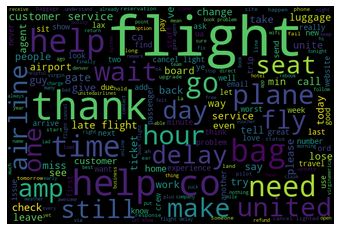

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allTweets = ' '.join([tweets for tweets in dataset['Tweets']])
wordCloud = WordCloud(width = 600, height = 400, random_state = 42, max_font_size = 100). generate(allTweets)

plt.imshow(wordCloud, interpolation = 'spline36')
plt.axis('off')
plt.show()

In [99]:
def Analyse_Sentiments(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

dataset['Sentiment_Tags'] = dataset['Polarity_Scale'].apply(Analyse_Sentiments)

dataset

,Tweets,Sbjectivity_Scale,Polarity_Scale,Sentiment_Tags
0,hepburn say,0.000000,0.00000,Neutral
1,plus i ve add commercial experience tacky,0.000000,0.00000,Neutral
2,today must mean need take another trip,0.687500,-0.31250,Negative
3,really aggressive blast obnoxious entertainmen...,0.350000,0.00625,Positive
4,really big bad thing,0.383333,-0.35000,Negative
...,...,...,...,...
1995,lose bag next flight time load 5 hour delay co...,0.000000,0.00000,Neutral
1996,day late flight one delayed amp one cancel lig...,0.650000,0.05000,Positive
1997,get first flight day ground time 1531 let go,0.333333,0.25000,Positive
1998,thank fly mess iad san diego help t co tlpbaupik5,0.537500,0.31250,Positive


In [100]:
# VALUE COUNT:
dataset['Sentiment_Tags'].value_counts()

Neutral     789
Positive    772
Negative    439
Name: Sentiment_Tags, dtype: int64

-------------

# DRAW A COUNTPLOT

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


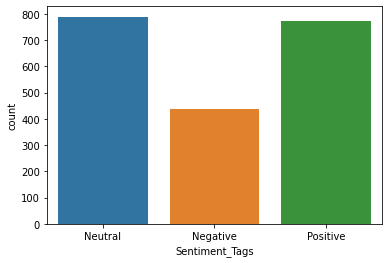

In [102]:
sns.countplot(dataset['Sentiment_Tags'])

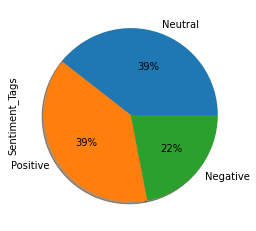

In [103]:
sentiment_count = dataset['Sentiment_Tags'].value_counts()
explode = (0, 0.1, 0)
sentiment_count.plot(kind ='pie', autopct = '%.0f%%', shadow = True,
                     figsize = (4,4), radius = 1.0)

In [104]:
dataset.head()

,Tweets,Sbjectivity_Scale,Polarity_Scale,Sentiment_Tags
0,hepburn say,0.000000,0.00000,Neutral
1,plus i ve add commercial experience tacky,0.000000,0.00000,Neutral
2,today must mean need take another trip,0.687500,-0.31250,Negative
3,really aggressive blast obnoxious entertainmen...,0.350000,0.00625,Positive
4,really big bad thing,0.383333,-0.35000,Negative


----------

# EXPORT DATASET

In [105]:
from google.colab import files
dataset.to_csv('NOVA_Sentiment_Analysis.csv') 
files.download('NOVA_Sentiment_Analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

------------

# CHECK LENGTH OF TWEETS AFTER PROCESSING

In [116]:
tweet_length = dataset

In [117]:
tweet_length.head()

,Tweets,Sbjectivity_Scale,Polarity_Scale,Sentiment_Tags
0,hepburn say,0.000000,0.00000,Neutral
1,plus i ve add commercial experience tacky,0.000000,0.00000,Neutral
2,today must mean need take another trip,0.687500,-0.31250,Negative
3,really aggressive blast obnoxious entertainmen...,0.350000,0.00625,Positive
4,really big bad thing,0.383333,-0.35000,Negative


In [120]:
tweet_length.drop(['Sbjectivity_Scale', 'Polarity_Scale', 'Sentiment_Tags',], axis=1, inplace=True)

In [121]:
tweet_length.head()

,Tweets
0,hepburn say
1,plus i ve add commercial experience tacky
2,today must mean need take another trip
3,really aggressive blast obnoxious entertainmen...
4,really big bad thing


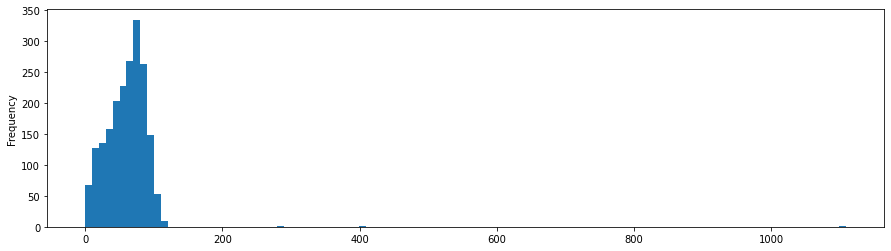

In [122]:
tweet_length['Tweets_length'] = tweet_length['Tweets'].apply(len)
tweet_length['Tweets_length'].plot(bins = 111, kind = 'hist', figsize = (15, 4), )

# COMMENTS:

As we had processed the DATASET for further analysis, we will be doing that in a different file.